In [234]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
import zipfile
import os
#kaggle competitions download -c digit-recognizer
with zipfile.ZipFile('./digit-recognizer.zip', 'r') as zip_ref:
    zip_ref.extractall('./digit-recognizer')
os.remove("./digit-recognizer.zip")

In [235]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [236]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
# First turn the pandas dataframe into an array so that we can run calculations on the data
data = np.array(data)
m, n = data.shape
print(m,n)
# We will shuffle the data and split into dev and training sets
np.random.shuffle(data)

42000 785


In [238]:
# Now we will split the data into test and validation data to ensure that there is no overfitting
data_dev = data[0:1000].T
# We will now split the data into our target variable Y and our independent variables which are the pixels.
Y_dev = data_dev[0] # n° of the image from the dataset
X_dev = data_dev[1:n]
# We now need to divide the values in the matrix by 255 because the values in this are between 0 and 225 as they are the pixel values, and we need to
# normalize the data in order to run it through a neural network
X_dev = X_dev /255


# We do the same things to training data
data_train = data[1000: m].T
Y_train = data_train[0] # n° of the image from the dataset
X_train = data_train[1: n]

X_train = X_train /255
# We will save the number of rows (image of the dataset) that we are training on in the variable m_train
_, m_train = X_train.shape


In [261]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    B1 = np.random.rand(10, 1) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    
    return W1, W2, B1, B2
#  subtract by -0,5 to make the values between -0.5 and 0.5 and so center the values around 0, useful for backpropagation learning

In [240]:
#function 
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def ReLU_deriv(Z):
    return Z > 0

# output converts to matrix (10,1) with a 1 in the position of the label digits
def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [241]:
def forwardPropagation( W1 , B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2

In [242]:
def backPropagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2 ,db2

In [243]:
def update_params(alpha, W1, W2, B1, B2, dW1, db1, dW2, db2):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * db1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * db2
    return W1, B1, W2, B2

In [276]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [245]:
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y)/ Y.size

In [277]:
def gradient_descent(X, Y, alpha , iterations):
    W1,W2,B1,B2 = init_params()
    for i in range(iterations):
        Z1 , A1, Z2, A2 = forwardPropagation(W1, B1, W2, B2, X)
        dW1, db1, dW2, db2 = backPropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(alpha, W1, W2, B1, B2, dW1, db1, dW2, db2)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, B1, W2, B2

In [247]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.2, 1001)

Iteration:  0
0.06278048780487805
Iteration:  100
0.7454390243902439
Iteration:  200
0.8219024390243902
Iteration:  300
0.8549024390243902
Iteration:  400
0.8713414634146341
Iteration:  500
0.882390243902439
Iteration:  600
0.8896341463414634
Iteration:  700
0.8955121951219512
Iteration:  800
0.899219512195122
Iteration:  900
0.9034146341463415
Iteration:  1000
0.9065121951219512


In [278]:
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forwardPropagation(W1, B1, W2, B2, X)
    return get_predictions(A2)

def test_prediction(index, W1, B1, W2, B2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, B1, W2, B2)
    label = Y_train[index]
    print('Predictions:', prediction)
    print('Label:', label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Predictions: [0]
Label: 0


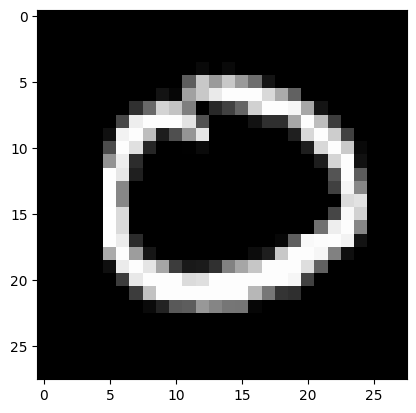

In [279]:
test_prediction(18, W1, B1, W2, B2)

In [255]:
validiation_dev_predictions = make_predictions(X_dev, W1, B1, W2, B2)
get_accuracy(validiation_dev_predictions, Y_dev)

0.887

In [93]:
#Adam optimization algorithm
#RMSprop + SGD with momentum

In [256]:
# Hyperparamètres
alpha = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8


# Variables pour Adam
vdW1, vdW2, vdB1, vdB2 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(B1), np.zeros_like(B2)
sdW1, sdW2, sdB1, sdB2 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(B1), np.zeros_like(B2)

In [258]:
def update_params_adam(vdW1, vdW2, vdB1, vdB2, sdW1, sdW2, sdB1, sdB2, t, dW1, dB1, dW2, dB2, W1, B1, W2, B2, alpha, beta1, beta2, epsilon):
    vdW1 = beta1 * vdW1 + (1 - beta1) * dW1
    vdB1 = beta1 * vdB1 + (1 - beta1) * dB1
    vdW2 = beta1 * vdW2 + (1 - beta1) * dW2
    vdB2 = beta1 * vdB2 + (1 - beta1) * dB2
    
    sdW1 = beta2 * sdW1 + (1 - beta2) * (dW1 ** 2)
    sdB1 = beta2 * sdB1 + (1 - beta2) * (dB1 ** 2)
    sdW2 = beta2 * sdW2 + (1 - beta2) * (dW2 ** 2)
    sdB2 = beta2 * sdB2 + (1 - beta2) * (dB2 ** 2)
    
    vdW1_corr = vdW1 / (1 - beta1 ** t)
    vdB1_corr = vdB1 / (1 - beta1 ** t)
    vdW2_corr = vdW2 / (1 - beta1 ** t)
    vdB2_corr = vdB2 / (1 - beta1 ** t)
    
    sdW1_corr = sdW1 / (1 - beta2 ** t)
    sdB1_corr = sdB1 / (1 - beta2 ** t)
    sdW2_corr = sdW2 / (1 - beta2 ** t)
    sdB2_corr = sdB2 / (1 - beta2 ** t)

    # Mise à jour des paramètres
    W1 -= alpha * vdW1_corr / (np.sqrt(sdW1_corr) + epsilon)
    B1 -= alpha * vdB1_corr / (np.sqrt(sdB1_corr) + epsilon)
    W2 -= alpha * vdW2_corr / (np.sqrt(sdW2_corr) + epsilon)
    B2 -= alpha * vdB2_corr / (np.sqrt(sdB2_corr) + epsilon)
    
    return vdW1, vdW2, vdB1, vdB2, sdW1, sdW2, sdB1, sdB2, W1, B1, W2, B2

In [262]:

def gradient_descent_adam(X, Y, alpha, epochs, beta1, beta2, epsilon):
    W1, W2, B1, B2 = init_params()
    vdW1, vdW2, vdB1, vdB2 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(B1), np.zeros_like(B2)
    sdW1, sdW2, sdB1, sdB2 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(B1), np.zeros_like(B2)
    
    for t in range(1, epochs + 1):
        Z1, A1, Z2, A2 = forwardPropagation(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = backPropagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        vdW1, vdW2, vdB1, vdB2, sdW1, sdW2, sdB1, sdB2, W1, B1, W2, B2 = update_params_adam(vdW1, vdW2, vdB1, vdB2, sdW1, sdW2, sdB1, sdB2, t, dW1, dB1, dW2, dB2, W1, B1, W2, B2, alpha, beta1, beta2, epsilon)
        
        if t % 100 == 0:
            print("Epoch: ", t)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    
    return W1, B1, W2, B2

In [263]:
W1, B1, W2, B2 = gradient_descent_adam(X_train, Y_train, alpha, 1001, beta1, beta2, epsilon)

Epoch:  100
0.9051219512195122
Epoch:  200
0.9318048780487805
Epoch:  300
0.943
Epoch:  400
0.9482439024390243
Epoch:  500
0.9520731707317073
Epoch:  600
0.9551463414634146
Epoch:  700
0.9577317073170731
Epoch:  800
0.9601951219512195
Epoch:  900
0.9618780487804878
Epoch:  1000
0.9627317073170731


In [264]:
test = pd.read_csv('./digit-recognizer/test.csv')

In [265]:
test.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [281]:
test = np.array(test).T
m,n = test.shape
print(m,n)

784 28000


In [282]:
X_test = test /255

In [288]:
def make_predictions(X, W1, B1, W2, B2):
    _, _, _, A2 = forwardPropagation(W1, B1, W2, B2, X)
    return get_predictions(A2)

def test_prediction_adam(index, W1, B1, W2, B2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(current_image, W1, B1, W2, B2)
    print('Predictions:', prediction)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Predictions: [1]


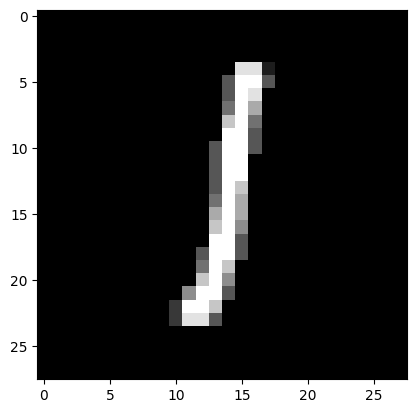

In [292]:
numero_image = np.random.randint(1, m)
test_prediction_adam(numero_image, W1, B1, W2, B2)
